In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import xgboost as xgb

In [8]:
Topic = pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Interview_Dataset/topics.csv')

In [9]:
Topic.head()

,id,topic,subject,Lables
0,1115,fcfs,Operating System,0
1,1923,dml,Database Management System,1
2,835,jdbc,Object_oriented_programing,2
3,1866,joints,Database Management System,1
4,1125,buffering,Operating System,0


In [11]:
Topic.tail()

,id,topic,subject,Lables
14,648,encapsulation,Object_oriented_programing,2
15,1771,transaction,Database Management System,1
16,127,Object,Object_oriented_programing,2
17,2383,sql,Database Management System,1
18,1376,keys,Database Management System,1


In [89]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB,ComplementNB,CategoricalNB,BernoulliNB,MultinomialNB
from sklearn.ensemble import BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,validation_curve,learning_curve

In [12]:
Topic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       19 non-null     int64 
 1   topic    19 non-null     object
 2   subject  19 non-null     object
 3   Lables   19 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 736.0+ bytes


In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()

In [16]:
Topic['topic'] = le.fit_transform(Topic['topic'])
Topic

,id,topic,subject,Lables
0,1115,9,Operating System,0
1,1923,7,Database Management System,1
2,835,10,Object_oriented_programing,2
3,1866,11,Database Management System,1
4,1125,3,Operating System,0
5,819,2,Object_oriented_programing,2
6,1291,6,Operating System,0
7,1900,5,Database Management System,1
8,688,13,Object_oriented_programing,2
9,1059,4,Operating System,0


In [17]:
Topic['subject'] = le.fit_transform(Topic['subject'])
Topic

,id,topic,subject,Lables
0,1115,9,2,0
1,1923,7,0,1
2,835,10,1,2
3,1866,11,0,1
4,1125,3,2,0
5,819,2,1,2
6,1291,6,2,0
7,1900,5,0,1
8,688,13,1,2
9,1059,4,2,0


In [18]:
X = Topic.drop(['Lables'],axis=1)

In [19]:
y = Topic.Lables

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test, y_train, y_test=train_test_split(X,y,test_size=0.30)

In [22]:
x_train.head()

,id,topic,subject
9,1059,4,2
10,811,17,1
18,1376,12,0
12,999,14,2
4,1125,3,2


In [23]:
x_test.head()

,id,topic,subject
2,835,10,1
8,688,13,1
7,1900,5,0
3,1866,11,0
11,1197,15,2


In [24]:
x_train.shape

(13, 3)

In [25]:
y_train.shape

(13,)

In [26]:
x_test.shape

(6, 3)

In [27]:
model = SVC(kernel='linear',C=1E10)

In [28]:
model.fit(X,y)

SVC(C=10000000000.0, kernel='linear')

In [29]:
New_prediction = model.predict(x_test)
New_prediction

array([2, 2, 1, 1, 0, 1], dtype=int64)

In [31]:
Train_Score = model.score(x_train,y_train)
Train_Score

1.0

In [33]:
Test_Score = model.score(x_test,y_test)
Test_Score

1.0

In [38]:
Lr_score = accuracy_score(y_test,New_prediction)

[[1 0 0]
 [0 3 0]
 [0 0 2]]


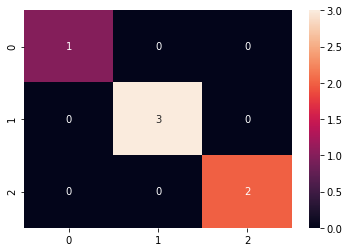

In [39]:
cm = confusion_matrix(y_test,New_prediction)
print(cm)
sns.heatmap(cm,annot=True)

In [35]:
from xgboost import XGBClassifier
clf = XGBClassifier()

In [36]:
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [37]:
y_pred = clf.predict(x_test)

In [40]:
Train_Score = model.score(x_train,y_train)
Train_Score

1.0

In [41]:
Test_Score = model.score(x_test,y_test)
Test_Score

1.0

In [43]:
Lr_score = accuracy_score(y_test,y_pred)
Lr_score

1.0

[[1 0 0]
 [0 3 0]
 [0 0 2]]


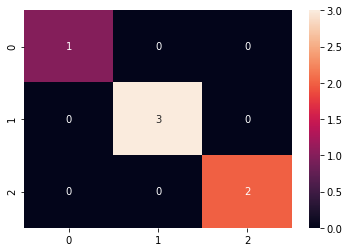

In [44]:
cm = confusion_matrix(y_test,New_prediction)
print(cm)
sns.heatmap(cm,annot=True)

In [53]:
Knn = KNeighborsClassifier(n_neighbors=10)

In [54]:
model1 = Knn.fit(x_train,y_train)
model1

KNeighborsClassifier(n_neighbors=10)

In [55]:
Train_score = Knn.score(x_train,y_train)
Train_score

0.38461538461538464

In [57]:
knn_predict = Knn.predict(x_test)

In [59]:
Test_score = Knn.score(x_test,knn_predict)
Test_score

1.0

In [60]:
Lr_score = accuracy_score(y_test,New_prediction)
Lr_score

1.0

[[1 0 0]
 [3 0 0]
 [2 0 0]]


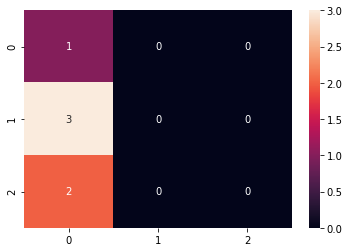

In [61]:
cm = confusion_matrix(y_test,knn_predict)
print(cm)
sns.heatmap(cm,annot=True)

In [63]:
Bnb = BernoulliNB()
Bnb_model=Bnb.fit(x_train,y_train)

In [64]:
Bnb.alpha

1.0

In [65]:
Train_Score = Bnb.score(x_train,y_train)
Train_Score

0.6923076923076923

In [66]:
Bnb_new_prediction = Bnb.predict(x_test)

In [67]:
Test_Score = Bnb.score(x_test,y_test)
Test_Score

0.6666666666666666

In [69]:
Cnb = ComplementNB()
Cnb_model=Cnb.fit(x_train,y_train)

In [70]:
Cnb.alpha

1.0

In [72]:
Train_Score = Cnb.score(x_train,y_train)
Train_Score

0.6923076923076923

In [73]:
Cnb_new_prediction = Cnb.predict(x_test)
Cnb_new_prediction

array([2, 2, 1, 1, 2, 1], dtype=int64)

In [74]:
Test_Score = Cnb.score(x_test,y_test)
Test_Score

0.8333333333333334

In [149]:
Mnb = MultinomialNB()

In [150]:
Mult_Model = Mnb.fit(x_train,y_train)

In [79]:
Train_Score = Mnb.score(x_train,y_train)
Train_Score

0.7692307692307693

In [152]:
Mnb_predict = Mnb.predict(x_test)

In [80]:
Test_Score = Mnb.score(x_test,y_test)
Test_Score

0.8333333333333334

In [81]:
Gnb = GaussianNB()

In [82]:
Mult_Model = Gnb.fit(x_train,y_train)

In [83]:
Train_Score = Gnb.score(x_train,y_train)
Train_Score

1.0

In [84]:
Test_Score = Gnb.score(x_test,y_test)
Test_Score

1.0

In [85]:
Gnb_pred = Gnb.predict(x_test)

In [86]:
Lr_score = accuracy_score(y_test,Gnb_pred)
Lr_score

1.0

[[1 0 0]
 [3 0 0]
 [2 0 0]]


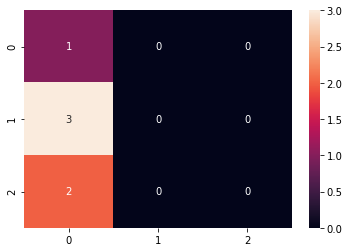

In [87]:
cm = confusion_matrix(y_test,knn_predict)
print(cm)
sns.heatmap(cm,annot=True)

In [92]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
clf

DecisionTreeClassifier()

In [94]:
Train_Score = clf.score(x_train,y_train)
Train_Score

1.0

In [96]:
clf_predict = clf.predict(x_test)

In [97]:
Test_Score = clf.score(x_test,clf_predict)
Test_Score

1.0

[[1 0 0]
 [0 3 0]
 [0 0 2]]


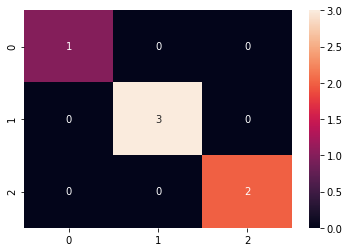

In [98]:
cm = confusion_matrix(y_test,clf_predict)
print(cm)
sns.heatmap(cm,annot=True)

In [99]:
clf = RandomForestClassifier(n_estimators=1000)
clf_model = clf.fit(x_train,y_train)

In [106]:
rfs_pred = clf.predict(x_test)

In [107]:
Train_Score = clf.score(x_train,y_train)
Train_Score

1.0

In [108]:
Test_Score = clf.score(x_test,y_test)
Test_Score

1.0

[[1 0 0]
 [0 3 0]
 [0 0 2]]


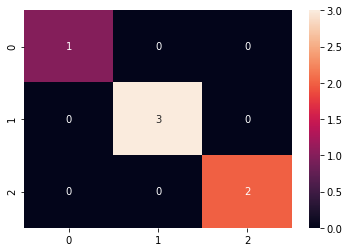

In [109]:
cm = confusion_matrix(y_test,rfs_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [110]:
BC = BaggingClassifier()

In [112]:
BC_model = BC.fit(x_train,y_train)

In [114]:
BC_pred = BC.predict(x_test)

In [115]:
Train_Score = BC.score(x_train,y_train)
Train_Score

1.0

In [116]:
Test_Score = BC.score(x_test,y_test)
Test_Score

1.0

In [118]:
BC_score = accuracy_score(y_test,BC_pred)
BC_score

1.0

[[1 0 0]
 [0 3 0]
 [0 0 2]]


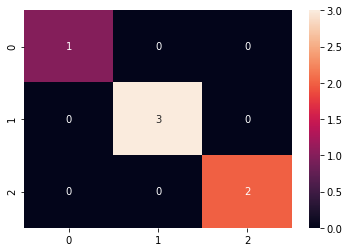

In [119]:
cm = confusion_matrix(y_test,BC_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [128]:
Lr = LogisticRegression(max_iter=500)

In [129]:
Lr_model = Lr.fit(x_train,y_train,)

In [130]:
Train_Score = Lr.score(x_train,y_train)
Train_Score

1.0

In [131]:
Test_Score = Lr.score(x_test,y_test)
Test_Score

1.0

In [132]:
Lr_pred = Lr.predict(x_test)

In [133]:
Lr_score = accuracy_score(y_test,Lr_pred)
Lr_score

1.0

[[1 0 0]
 [0 3 0]
 [0 0 2]]


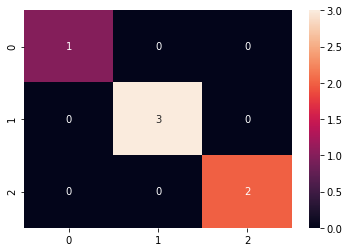

In [134]:
cm = confusion_matrix(y_test,Lr_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [127]:
Ada = AdaBoostClassifier()

In [135]:
Ada_model = Ada.fit(x_train,y_train)

In [136]:
Train_Score = Ada.score(x_train,y_train)
Train_Score

1.0

In [137]:
Test_Score = Ada.score(x_test,y_test)
Test_Score

1.0

In [138]:
Ada_pred = Ada.predict(x_test)

In [139]:
Ada_score = accuracy_score(y_test,Ada_pred)
Ada_score

1.0

[[1 0 0]
 [0 3 0]
 [0 0 2]]


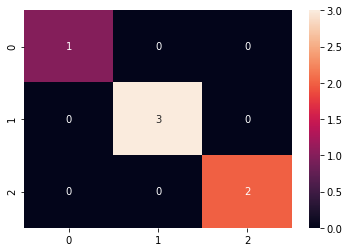

In [140]:
cm = confusion_matrix(y_test,Ada_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [141]:
GBC = GradientBoostingClassifier()

In [143]:
GBC_model = GBC.fit(x_train,y_train)

In [144]:
Train_Score = GBC.score(x_train,y_train)
Train_Score

1.0

In [145]:
Test_Score = GBC.score(x_test,y_test)
Test_Score

1.0

In [146]:
GBC_pred = GBC.predict(x_test)

In [147]:
GBC_score = accuracy_score(y_test,GBC_pred)
GBC_score

1.0

[[1 0 0]
 [0 3 0]
 [0 0 2]]


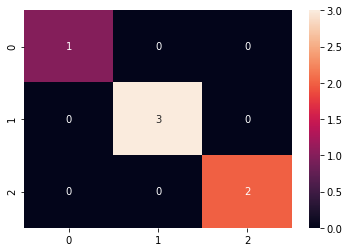

In [148]:
cm = confusion_matrix(y_test,GBC_pred)
print(cm)
sns.heatmap(cm,annot=True)

In [154]:
df = pd.DataFrame({'Logistic_pred':Lr_pred,
                  'knn_prediction':knn_predict,
                  'Bnb_prediction':Bnb_new_prediction,
                  'Cnb_prediction':Cnb_new_prediction,
                  'Mnb_pred':Mnb_predict,
                  'Gnb_prediction':Gnb_pred,
                  'clf_prediction':clf_predict,
                  'rfc_predion':rfs_pred,
                  'Xgb_prediction':y_pred,
                  'Gradient_prediction':GBC_pred,
                  'Adaboosting_pred':Ada_pred,
                  'Bagging_pred':BC_pred})
df

,Logistic_pred,knn_prediction,Bnb_prediction,Cnb_prediction,Mnb_pred,Gnb_prediction,clf_prediction,rfc_predion,Xgb_prediction,Gradient_prediction,Adaboosting_pred,Bagging_pred
0,2,0,0,2,2,2,2,2,2,2,2,2
1,2,0,0,2,2,2,2,2,2,2,2,2
2,1,0,1,1,1,1,1,1,1,1,1,1
3,1,0,1,1,1,1,1,1,1,1,1,1
4,0,0,0,2,2,0,0,0,0,0,0,0
5,1,0,1,1,1,1,1,1,1,1,1,1
